In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
(train_fx, train_fy), (test_fx, test_fy) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_fx.shape, train_fy.shape, test_fx.shape, test_fy.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Reduce pixel values
train_fx, test_fx = train_fx / 255.0, test_fx / 255.0

In [ ]:
mlp = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])

In [ ]:
mlp.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit
history = mlp.fit(train_fx, train_fy, epochs=5, validation_data = (test_fx, test_fy))

Epoch 1/20
1563/1563 [==============================] - 175s 112ms/step - loss: 1.8071 - accuracy: 0.3563 - val_loss: 1.6966 - val_accuracy: 0.3900
Epoch 2/20
1563/1563 [==============================] - 173s 111ms/step - loss: 1.6182 - accuracy: 0.4304 - val_loss: 1.6069 - val_accuracy: 0.4270
Epoch 3/20
1563/1563 [==============================] - 174s 111ms/step - loss: 1.5363 - accuracy: 0.4578 - val_loss: 1.5711 - val_accuracy: 0.4513
Epoch 4/20
1563/1563 [==============================] - 174s 111ms/step - loss: 1.4766 - accuracy: 0.4788 - val_loss: 1.5058 - val_accuracy: 0.4564
Epoch 5/20
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4254 - accuracy: 0.5008 - val_loss: 1.4730 - val_accuracy: 0.4759
Epoch 6/20
1563/1563 [==============================] - 173s 111ms/step - loss: 1.3827 - accuracy: 0.5149 - val_loss: 1.5306 - val_accuracy: 0.4396
Epoch 7/20
1563/1563 [==============================] - 173s 111ms/step - loss: 1.3447 - accuracy: 0.5294 - val_

In [ ]:
mlp.evaluate(test_fx, test_fy)

313/313 [==============================] - 11s 34ms/step - loss: 1.3354 - accuracy: 0.5299


[1.3353830575942993, 0.5299000144004822]

In [ ]:
pred_y = mlp.predict(test_fx)
pred_y_r = [np.argmax(element) for element in pred_y]

In [ ]:
confusion = confusion_matrix(y_true=test_fy, y_pred=pred_y_r)
confusion

array([[450,  56,  38,  12,  65,  60,  62,  12, 175,  70],
       [  8, 697,   1,  13,  12,  23,  28,  12,  61, 145],
       [ 39,  18, 194,  53, 158, 218, 239,  38,  19,  24],
       [ 10,  22,  17, 205,  74, 369, 222,  23,  22,  36],
       [ 13,   8,  25,  22, 472, 123, 263,  36,  25,  13],
       [  2,  10,  10,  98,  64, 630, 127,  28,  17,  14],
       [  1,  11,   8,  21,  60,  71, 805,   5,   8,  10],
       [  9,  13,  12,  30, 124, 163,  78, 507,  18,  46],
       [ 36,  69,   8,  20,  26,  32,  26,   6, 724,  53],
       [ 10, 164,   2,  17,  17,  37,  45,  24,  69, 615]])

In [ ]:
classification = classification_report(test_fy,pred_y_r)
print(classification)

              precision    recall  f1-score   support

           0       0.78      0.45      0.57      1000
           1       0.65      0.70      0.67      1000
           2       0.62      0.19      0.30      1000
           3       0.42      0.20      0.27      1000
           4       0.44      0.47      0.46      1000
           5       0.37      0.63      0.46      1000
           6       0.42      0.81      0.56      1000
           7       0.73      0.51      0.60      1000
           8       0.64      0.72      0.68      1000
           9       0.60      0.61      0.61      1000

    accuracy                           0.53     10000
   macro avg       0.57      0.53      0.52     10000
weighted avg       0.57      0.53      0.52     10000



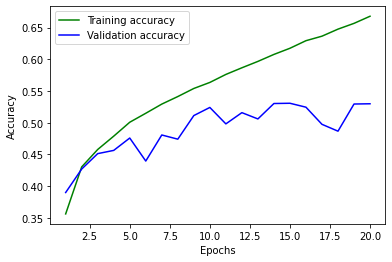

In [15]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()